In [52]:
import torchvision.transforms
from doctr.datasets import SROIE
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
import torchvision

In [37]:
train_dataset = SROIE(train=True, download=True)
test_dataset = SROIE(train=False, download=True)

In [38]:
print([int(0.9 * len(train_dataset)) + 1, int( 0.1 * len(train_dataset))])
print(sum([int(0.9 * len(train_dataset)) + 1, int( 0.1 * len(train_dataset))]))
print(len(train_dataset))

[564, 62]
626
626


In [43]:
batch_size = 128

train_dataset, val_dataset = random_split(train_dataset, [int(0.9 * len(train_dataset)) + 1, int( 0.1 * len(train_dataset))])

train_loader = DataLoader(
    train_dataset,
    shuffle=True
)

val_loader = DataLoader(
    val_dataset,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    shuffle=True
)


A single batch of images has shape: torch.Size([1, 3, 1511, 623])
A single RBG img has 3 channels, width 1511, and height 623.
Size of a batch of imgs flattend with flatten: torch.Size([1, 2824059])
True


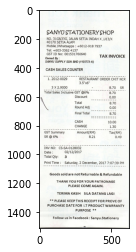

In [57]:
imgs, labels = next(iter(train_loader))
print(f'A single batch of images has shape: {imgs.size()}')
example_img = imgs[0]
c, w, h = example_img.size()
print(f'A single RBG img has {c} channels, width {w}, and height {h}.')

batch_flat_flatten = imgs.flatten(1)
print(f'Size of a batch of imgs flattend with flatten: {batch_flat_flatten.size()}')

d = example_img.flatten().size()[0]
print(c * w * h == d)

t = torchvision.transforms.ToPILImage()
#plt.xlim(1500, 3200)
plt.imshow(t(example_img))
